# Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n_{th}$ degree polynomial in $x$.

Degree of the polynomial is the number of terms in the polynomial. For example, a polynomial of degree 2 has two terms, a polynomial of degree 3 has three terms, and so on.

<img src="../../../assets/polynomial_example.png" style="display: block; margin-left: auto; margin-right: auto; width: 500px">

<p style="text-align: center;">Polynomial regression fits a nonlinear relationship between the value of <em>x</em> and the corresponding conditional mean of <em>y</em>, denoted <em>E(y | x)</em>. </p>
<p style="text-align: center;">The form of this functional relationship is determined by the degree of the polynomial <em>n</em>.</p>
<p style="text-align: center;">The polynomial regression equation is given by:</p>
<p style="text-align: center;"><em>y = b<sub>0</sub> + b<sub>1</sub>x + b<sub>2</sub>x<sup>2</sup> + b<sub>3</sub>x<sup>3</sup> + ... + b<sub>n</sub>x<sup>n</sup></em></p>
<p style="text-align: center;">where <em>b<sub>0</sub></em> is the intercept, <em>b<sub>1</sub></em> is the coefficient for <em>x</em>, <em>b<sub>2</sub></em> is the coefficient for <em>x<sup>2</sup></em>, and so on.</p>
<p style="text-align: center;">To optimize the parameters <em>b<sub>0</sub></em>, <em>b<sub>1</sub></em>, <em>b<sub>2</sub></em>, ..., <em>b<sub>n</sub></em>, we can use <a href="https://github.com/nmkzzztos/Likbez_ML/blob/main/algorithms/Regression/GradientDescent.ipynb">Gradient Descent</a>.</p>

## Implementation

In [12]:
import numpy as np

class PolynomialRegression:
    '''
    Polynomial Regression model
    
    Attributes:
        learning_rate (float): The learning rate of the model
        epochs (int): The number of epochs to train the model
        degree (int): The degree of the polynomial
        weights (numpy.ndarray): The weights of the model
        bias (float): The bias of the model
        
    Methods:
        _get_weights_(): Returns the weights of the model
        _polynomial_features(X: np.ndarray): Returns the polynomial features of the input
        fit(X: np.ndarray, y: np.ndarray): Fits the model to the input data
        predict(X: np.ndarray): Predicts the output for the input data
        evaluate(X: np.ndarray, y: np.ndarray): Evaluates the model on the input data
        plot(X: np.ndarray, y: np.ndarray): Plots the input data and the predicted output
    '''
    def __init__(self, learning_rate=0.01, epochs=1000, degree=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.degree = degree
        self.weights = None
        self.bias = None

    def _get_weights_(self) -> np.ndarray:
        '''Returns the weights of the model'''
        return self.weights
    
    def _polynomial_features(self, X: np.ndarray) -> np.ndarray:
        '''
        Returns the polynomial features of the input

        Args:
            X (numpy.ndarray): The input data

        Returns:
            numpy.ndarray: The polynomial features of the input
        '''
        X_poly = np.ones((X.shape[0], self.degree + 1))
        for i in range(0, self.degree + 1):
            X_poly[:,i] = X.flatten() ** i
        return X_poly

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        '''
        Fits the model to the input data
        
        Args:
            X (numpy.ndarray): The input data
            y (numpy.ndarray): The output data
        '''
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)

        # Number of samples
        num_samples, _ = X.shape
        
        # Initialize weights and bias
        self.weights = np.random.uniform(0, 1, size=(self.degree + 1))
        self.bias = 0

        X_poly = self._polynomial_features(X)

        for _ in range(self.epochs):
            y_predicted = np.dot(X_poly, self.weights) + self.bias # Predicted values
            diff = y_predicted - y                                 # Difference between predicted and actual values

            # Calculate gradients
            db = np.sum(diff) / num_samples
            dw = np.dot(X_poly.T, diff) / num_samples

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Predicts the output for the input data

        Args:
            X (numpy.ndarray): The input data

        Returns:
            numpy.ndarray: The predicted output
        '''
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        X_poly = self._polynomial_features(X)
        return np.dot(X_poly, self.weights) + self.bias
    
    def evaluate(self, X: np.ndarray, y: np.ndarray) -> float:
        '''
        Evaluates the model on the input data

        Args:
            X (numpy.ndarray): The input data
            y (numpy.ndarray): The output data
        
        Returns:
            float: The mean absolute error
        '''
        y_predicted = self.predict(X)
        return np.mean(np.abs(y_predicted - y)) # MAE (Mean Absolute Error)
    
    def plot(self, X: np.ndarray, y: np.ndarray) -> None:
        '''
        Plots the input data and the predicted output

        Args:
            X (numpy.ndarray): The input data
            y (numpy.ndarray): The output data
        '''
        import matplotlib.pyplot as plt
        y_predicted = self.predict(X)
        plt.scatter(X, y, color='blue')
        plt.plot(X, y_predicted, color='red')
        plt.show()


## Dataset

We will use custom dataset for this example. The dataset contains 30 examples and 2 columns: Years of Experience and Salary. We will use Years of Experience to predict Salary.

In [2]:
import pandas as pd

# Dataset of 30 employees with their years of experience and salary
df = pd.DataFrame({'YearsExperience': [1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7, 3.9, 4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6, 6.8, 7.1, 7.9, 8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5], 'Salary': [21546, 27546, 26464, 36875, 39891, 56642, 60150, 57864, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 69546, 67656, 71456, 72546, 70546, 72565, 74687, 73967, 76854, 78567, 80244, 76546, 81245]})

X = df['YearsExperience'].values
y = df['Salary'].values

## Train and Test

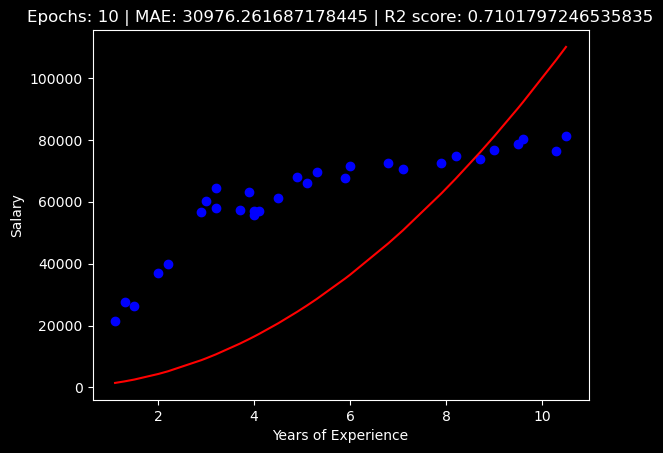

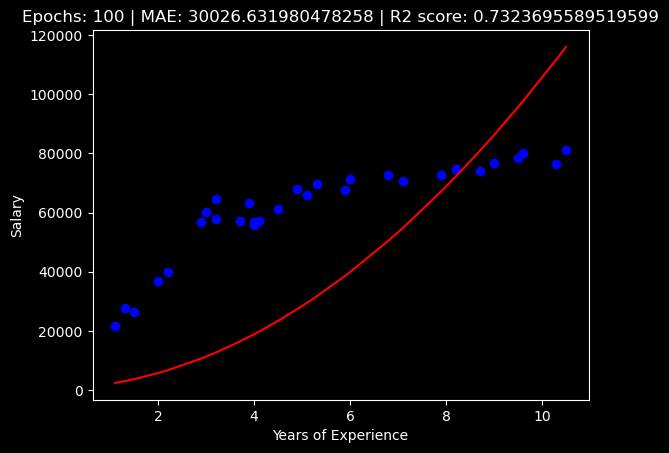

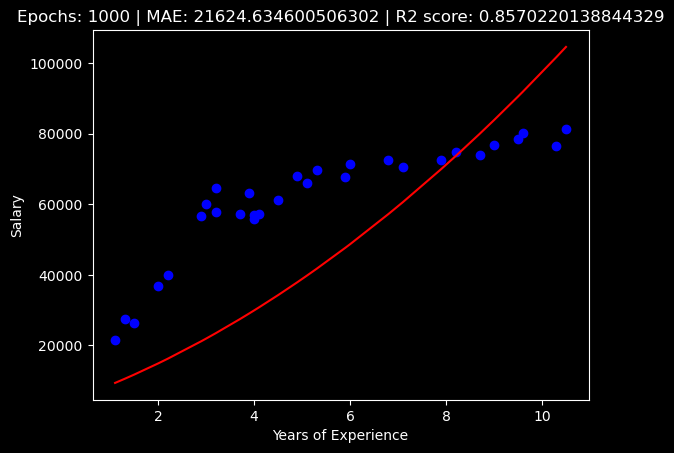

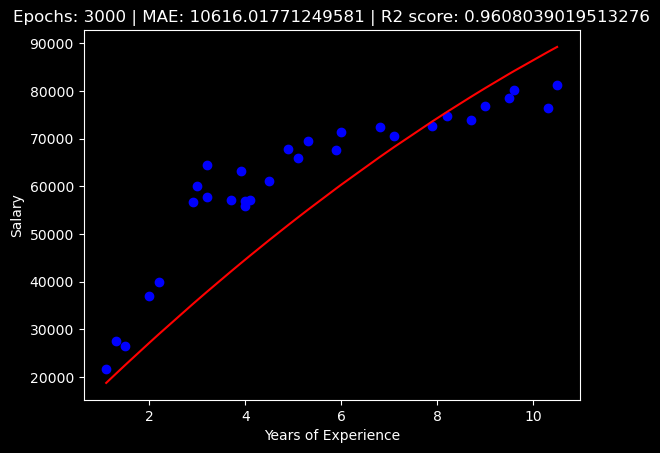

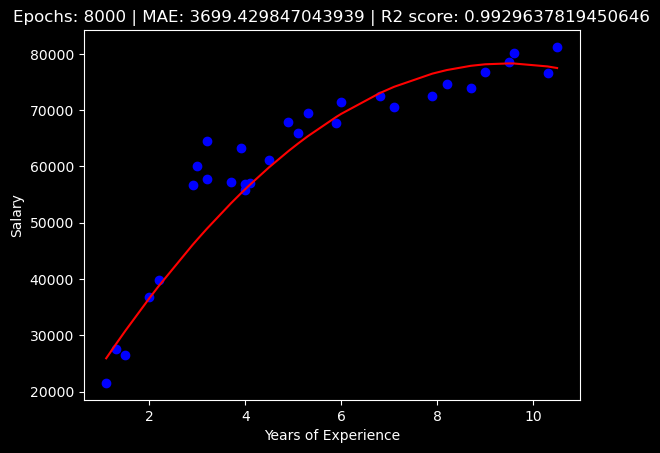

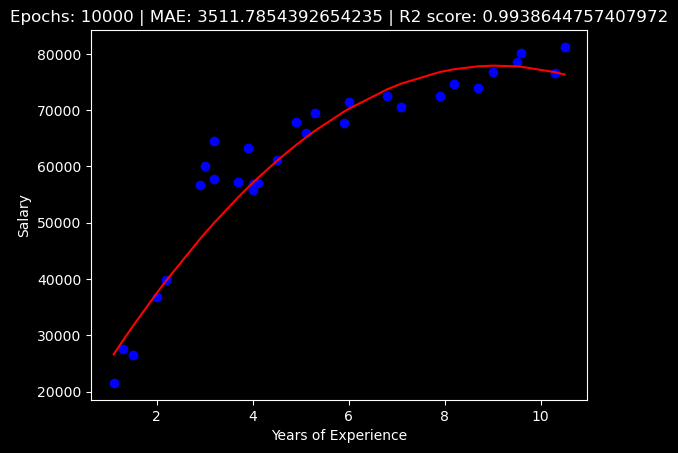

MAE = 3511.7854392654235
R2 score: 0.9938644757407972


In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

diff_epochs = [10, 100, 1000, 3000, 8000, 10000]

for epochs in diff_epochs:
    model = PolynomialRegression(learning_rate=0.0001, epochs=epochs, degree=2)
    model.fit(X_train, y_train)
    MAE = model.evaluate(X, y)
    R2_score = 1 - (np.sum((y - model.predict(X))**2) / np.sum((y - np.mean(X))**2) )
    plt.title(f'Epochs: {epochs} | MAE: {MAE} | R2 score: {R2_score}')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    model.plot(X, y)

MAE = model.evaluate(X, y)
print(f'MAE = {MAE}')
R2_score = 1 - (np.sum((y - model.predict(X))**2) / np.sum((y - np.mean(X))**2) )
print(f'R2 score: {R2_score}')

## Comparison with Polynomial Regression from sklearn

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

MAE_sklearn = np.mean(np.abs(y - y_pred))	
R2_score_sklearn = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2) )

print(f'MAE (sklearn): {MAE_sklearn} | MAE (custom): {MAE}')
print(f'R2 score (sklearn): {R2_score_sklearn} | R2 score (custom): {R2_score}')

MAE (sklearn): 3776.1535878692034 | MAE (custom): 3511.7854392654235
R2 score (sklearn): 0.9123931097040532 | R2 score (custom): 0.9938644757407972
